# " Quasiprobability functions using QuTip"
> "Here I want to present more of the foundations of quasiprobability functions and provide tools to facilitate its visualization."

- toc: true
- branch: master
- badges: true
- comments: true
- categories: [Probability, Quantum Mechanics, QuTip, Wigner, Schrodinger Cat]


In [20]:
%matplotlib inline
import matplotlib.pylab as plt
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

In [21]:
import numpy as np

In [22]:
from qutip import *

## Introduction

Hello again readers! My intention today is to talk a little more about quasi-probability distributions, some of their properties and their importance in my field, quantum mechanics. In case you still don't know what a quasi-probability distribution is, it is a mathematical object similar to a probability distribution, but which relaxes some of [Kolmogorov's axioms of probability theory](https://en.wikipedia.org/wiki/Probability_axioms). They share several features with the ordinary distrbutions in wich we are used to, like the ability to *yield expectation values with respect to the weights of the distribution* - which is crucial to quantum mechanics as you probably already know. 

They can however violate the $σ$-additivity axiom: integrating them over does not necessarily yield probabilities of mutually exclusive states. Indeed, quasiprobability distributions also counterintuitively *have regions of negative probability density*, contradicting the first axiom. One of the most useful quasiprobability distributions in my area of research is the Wigner quasiprobability distribution - which I intend to explain and show different ways of visualization and application through QuTip tools during this publication.

## Definition of the Wigner function

The Wigner function or the Wigner–Ville distribution (named after [Eugene Wigner](https://en.wikipedia.org/wiki/Eugene_Wigner) and [Jean-André Ville](https://fr.wikipedia.org/wiki/Jean_Ville)) is a famous quasiprobability distribution. It was introduced by Eugene Wigner in 1932 to study quantum corrections to classical statistical mechanics. The goal was to link the wavefunction that appears in Schrödinger's equation to a probability distribution in phase space.

We can see it as a generating function for all spatial autocorrelation functions of a given quantum-mechanical wavefunction $\psi(x)$. Thus, it maps on the quantum density matrix in the map between real phase-space functions and Hermitian operators. It was later rederived by Jean Ville in 1948 as a quadratic (in signal) representation of the local time-frequency energy of a signal, effectively a spectrogram, which makes it widely used in this area until today.

The formal defnition of the Wigner distribution $W(x,p)$ of a pure state is defined as: 

$$ W(x,p)~{\stackrel {\text{def}}{=}}~{\frac {1}{\pi \hbar }}\int _{-\infty }^{\infty }\psi ^{*}(x+y)\psi (x-y)e^{2ipy/\hbar }dy $$

where $\psi$ is the wavefunction, and $x$ and $p$ are position and momentum, but could be any conjugate variable pair (e.g. real and imaginary parts of the electric field or frequency and time of a signal). Note that it may have support in $x$ even in regions where $\psi$ has no support in $x$ ("beats"). 

Just out of curiosity, I think it's important to point out that it is symmetric in $x$ and $p$ using the normalized momentum-space wave function $\varphi$, which is obtained by the Fourier transform os $\psi$.

$$ W(x,p)={\frac {1}{\pi \hbar }}\int _{-\infty }^{\infty }\varphi ^{*}(p+q)\varphi (p-q)e^{-2ixq/\hbar }dq $$


### Visualizing the wigner function for superposition of fock states

Let $ |m\rangle \equiv {a^{\dagger m}}/{\sqrt{m!}}|0\rangle$ be the $m$-Fock state  of a quantum harmonic oscillator. The wigner function associeted to this system where discovered by Groenewold (1946) in deminesionless variables as

$$ W_{|m\rangle }(x,p)={\frac {(-1)^{m}}{\pi }}e^{-(x^{2}+p^{2})}L_{m}{\big (}2(p^{2}+x^{2}){\big )} $$

Where $L_m (x)$ denotes the $m$-th [Laguerre polynomial](https://en.wikipedia.org/wiki/Laguerre_polynomials).

This may follow from the expression for the static eigenstate wavefunctions, 

$$  u_{m}(x)=\pi ^{-1/4}H_{m}(x)e^{-x^{2}/2}$$ 

where $H_m$ is the $m$-th [Hermite polynomial](https://en.wikipedia.org/wiki/Hermite_polynomials).From the above definition of the Wigner function, upon a change of integration variables, 

$$ W_{|m\rangle }(x,p)={\frac {(-1)^{m}}{\pi ^{3/2}2^{m}m!}}e^{-x^{2}-p^{2}}\int _{-\infty }^{\infty }d\zeta \,e^{-\zeta ^{2}}H_{m}(\zeta -ip+x)H_{m}(\zeta -ip-x) $$

The expression then follows from the integral relation between Hermite and Laguerre polynomials. One can use the [QuTip-wigner()](https://qutip.org/docs/4.0.2/modules/qutip/wigner.html) function to make that definition visible like so:

In [23]:
x = 1.0 / np.sqrt(2) * (basis(10, 4) + basis(10, 2))
xvec = np.arange(-5, 5, 10.0 / 100)
yvec = xvec
W = wigner(x, xvec, yvec)
cmap = wigner_cmap(W)
X, Y = np.meshgrid(xvec, yvec)

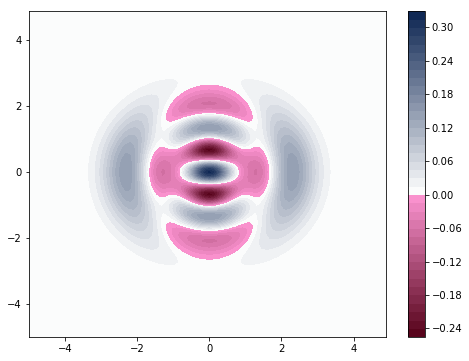

In [24]:
fig = plt.figure(figsize=(8,6))
plt.contourf(X, Y, W, 50, cmap=cmap)
plt.colorbar();

Here, we use the same color system ideia of the [last post](https://resteche.github.io/REsteche_blog/plot_schmidt/plot_qubism/complex_array_to_rgb/entanglement/2022/04/24/qubism.html) to highlight the probability distribution in a 2D plot, but we can also add another axis to make it even more interesting and easy to comprehend 

(also adding a legend for the ColorBar to make the chart more independent)

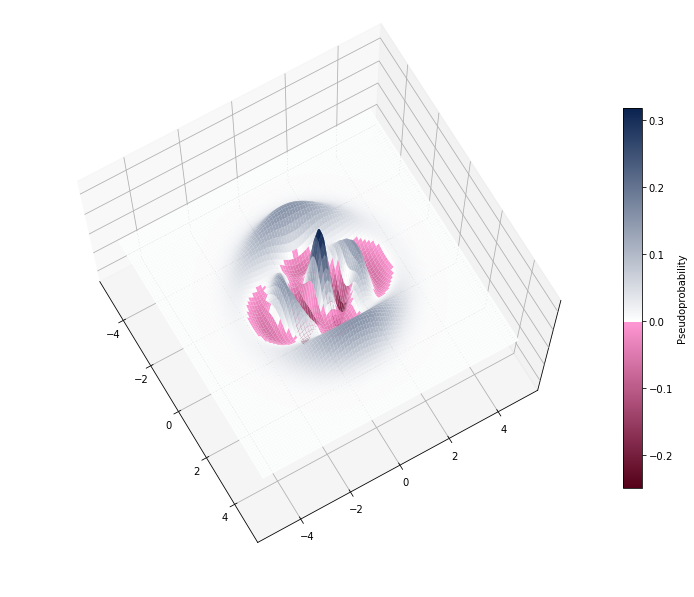

In [25]:
fig = plt.figure(figsize=(10,8))
ax = Axes3D(fig, azim=-30, elev=73)
ax.plot_surface(X, Y, W, cmap=cmap, rstride=1, cstride=1, alpha=1, linewidth=0)
ax.set_zlim3d(-0.25, 0.25)
for a in ax.w_zaxis.get_ticklines() + ax.w_zaxis.get_ticklabels():
    a.set_visible(False)
nrm = mpl.colors.Normalize(W.min(), W.max())
cax, kw = mpl.colorbar.make_axes(ax, shrink=.66, pad=.02)
cb1 = mpl.colorbar.ColorbarBase(cax, cmap=cmap, norm=nrm)
cb1.set_label('Pseudoprobability')

## Winger and Q-function for squeezed states

In quantum mechanics, we say that a **squeezed coherent state** is a quantum state that is usually described by two non-commuting observables having continuous spectra of eigenvalues. In other words, any state that can be described by just two of its canonically conjugated variables (take as an exemple the position $x$ and momentum $p$ of a particle) its a squeezed state. Logically, the product of the standard deviations of two such operators obeys the uncertainty principle.

The most general wave function that satisfies the relation mentioned is the **squeezed coherent state** (working with unit $\hbar = 1$)


$$\psi (x)=C \exp \left(-{\frac  {(x-x_{0})^{2}}{2w_{0}^{2}}}+ip_{0}x\right) $$

where $C, x-0, \omega_0, p_0$ are constants (a normalization constant, the center of the wavepacket, its width, and the expectation value of its momentum). The only new feature relative to a coherent state is the free value of the width $\omega_0$, which is indeed the reason why the state is called "squeezed". The squeezed state above is an eigenstate of a linear operator

$${\hat  x}+i{\hat  p}w_{0}^{2} $$ 

and the corresponding eigenvalue equals $x_{0}+ip_{0}w_{0}^{2}$. In this sense, it is a generalization of the ground state as well as the coherent state. Firt, lets define all the parameters of our squeezed state by doing:


In [26]:
N = 20
alpha = -1.0 # Coherent amplitude of field
epsilon = 0.5j # Squeezing parameter 
a = destroy(N)

D = (alpha * a.dag() - np.conj(alpha) * a).expm()  # Displacement
S = (0.5 * np.conj(epsilon) * a * a - 0.5 * epsilon * a.dag() * a.dag()).expm()  # Squeezing
psi = D * S * basis(N, 0)  # Apply to vacuum state
g = 2

### Wigner function of a squeezed state

For that and the next plot, lets try something different. The idea here is to generate the three-dimensional plot of a wigner function of a squeezed state. We will then proceed with this, and to increase our visualization of it, we will also generate two-dimensional plots in the planes formed by the intersections of the label axes:

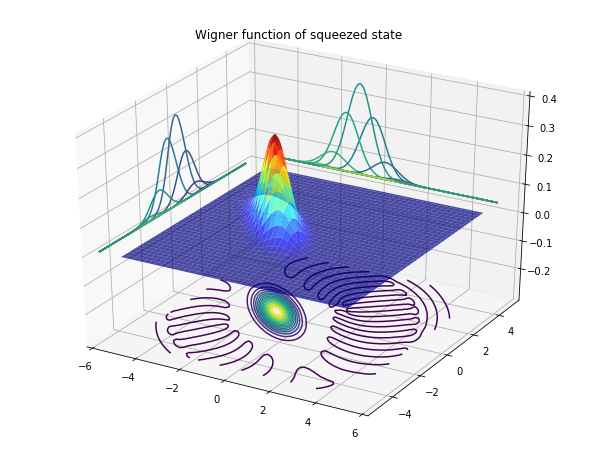

In [27]:
xvec = np.arange(-40.,40.)*5./40
X,Y = np.meshgrid(xvec, xvec)

W = wigner(psi, xvec, xvec)

fig1 = plt.figure(figsize=(8,6))
ax = Axes3D(fig1)
ax.plot_surface(X, Y, W, rstride=2, cstride=2, cmap=cm.jet, alpha=0.7)
ax.contour(X, Y, W, 15,zdir='x', offset=-6)
ax.contour(X, Y, W, 15,zdir='y', offset=6)
ax.contour(X, Y, W, 15,zdir='z', offset=-0.3)
ax.set_xlim3d(-6,6)
ax.set_xlim3d(-6,6)
ax.set_zlim3d(-0.3,0.4)
plt.title('Wigner function of squeezed state');

### The Q-function

Here, I want to recall that in quantum mechanics the **Husimi Q representation**, or Q-function in the context of quantum optics, was introduced by Kôdi Husimi in 1940. It is a quasiprobability distribution commonly used in quantum mechanics to represent *the phase space distribution of a quantum state such as light in the phase space formulation.* It is also one of the simplest distributions of quasiprobability in phase space because it's constructed in such a way that observables written in anti-normal order follow the [optical equivalence theorem](https://en.wikipedia.org/wiki/Optical_equivalence_theorem). This means that it is essentially the density matrix put into normal order. This makes it relatively easy to calculate compared to other quasiprobability distributions through the formula

$$ Q(\alpha)=\frac{1}{\pi}\langle\alpha|\hat{\rho}|\alpha\rangle  $$

which is effectively a trace of the density matrix over the basis of coherent states $|\alpha \rangle $. It produces a pictorial representation of the state $ρ$ to illustrate several of its mathematical properties. Its relative ease of calculation is related to its smoothness compared to other quasiprobability distributions. In fact, it can be understood as the Weierstrass transform of the Wigner quasiprobability distribution, i.e. a smoothing by a Gaussian filter,

$$ Q(\alpha)= \frac{2}{\pi} \int W(\beta) e^{-2|\alpha-\beta|^2} \, d^2\beta $$

For a clear visualization of this distribution, we are going to use a submodule of the widget function in QuTip as it follows,

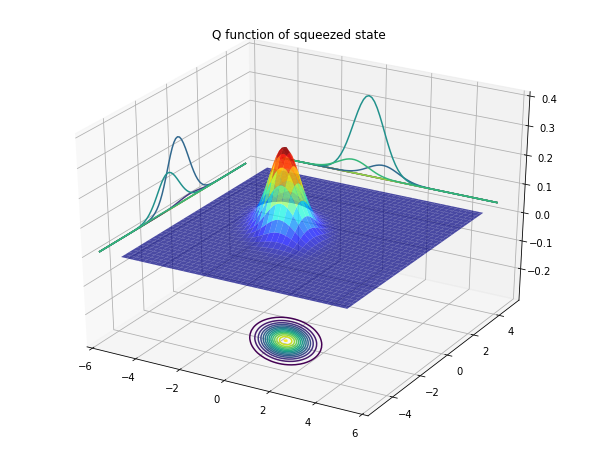

In [28]:
Q = qfunc(psi, xvec, xvec, g);

fig2 = plt.figure(figsize=(8,6))
ax = Axes3D(fig2)
ax.plot_surface(X, Y, Q, rstride=2, cstride=2, cmap=cm.jet, alpha=0.7)
ax.contour(X, Y, Q,zdir='x', offset=-6)
ax.contour(X, Y, Q,zdir='y', offset=6)
ax.contour(X, Y, Q, 15,zdir='z', offset=-0.4)
ax.set_xlim3d(-6,6)
ax.set_xlim3d(-6,6)
ax.set_zlim3d(-0.3,0.4)
plt.title('Q function of squeezed state');

## Schrodinger cat state

In quantum mechanics, the cat state, named after Schrödinger's cat, *is a quantum state composed of two diametrically opposed conditions at the same time*, such as the possibilities that a cat is **alive and dead at the same time**.

Generalizing Schrödinger's thought experiment, any other quantum superposition of two macroscopically distinct states is also referred to as a cat state. A cat state could be of one or more modes or particles, therefore it is not necessarily an entangled state. Such cat states have been experimentally realized in various ways and at various scales.

One can then imagine a cat state defined as the quantum superposition of two opposite-phase coherent states of a single optical mode (e.g., a quantum superposition of large positive electric field and large negative electric field) 

$$ |\mathrm {cat} _{e}\rangle \propto |\alpha \rangle +|{-}\alpha \rangle $$

where

$$ |\alpha \rangle =e^{-{\frac {1}{2}}|\alpha |^{2}}\sum _{n=0}^{\infty }{\frac {\alpha ^{n}}{\sqrt {n!}}}|n\rangle  $$ 

and

$$ |{-}\alpha \rangle =e^{-{\frac {1}{2}}|{-}\alpha |^{2}}\sum _{n=0}^{\infty }{\frac {({-}\alpha )^{n}}{\sqrt {n!}}}|n\rangle $$

are coherent states defined in the number (Fock) basis. Notice that if we add the two states together, the resulting cat state only contains even Fock state terms:

$$ |\mathrm {cat} _{e}\rangle \propto 2e^{-{\frac {1}{2}}|\alpha |^{2}}\left({\frac {\alpha ^{0}}{\sqrt {0!}}}|0\rangle +{\frac {\alpha ^{2}}{\sqrt {2!}}}|2\rangle +{\frac {\alpha ^{4}}{\sqrt {4!}}}|4\rangle +\dots \right) $$

As a result of this property, the above cat state is often referred to as an even cat state. Alternatively, we can define an odd cat state as

$$|\mathrm {cat} _{o}\rangle \propto |\alpha \rangle -|{-}\alpha \rangle $$

which will only contains odd Fock states. We can also work with the ideia of a linear superposition of two coherent states with opposite phases to from a simple example of a cat state. When each state has the same weight:


$${\displaystyle {\begin{aligned}|\mathrm {cat} _{e}\rangle &={\frac {1}{\sqrt {2\left(1+e^{-2|\alpha |^{2}}\right)}}}{\big (}|\alpha \rangle +|{-}\alpha \rangle {\big )},\\|\mathrm {cat} _{o}\rangle &={\frac {1}{\sqrt {2\left(1-e^{-2|\alpha |^{2}}\right)}}}{\big (}|\alpha \rangle -|{-}\alpha \rangle {\big )},\\|\mathrm {cat} _{\theta }\rangle &={\frac {1}{\sqrt {2\left(1+\cos(\theta )e^{-2|\alpha |^{2}}\right)}}}{\big (}|\alpha \rangle +e^{i\theta }|{-}\alpha \rangle {\big )}.\end{aligned}}} $$

The larger the value of $\alpha$, the lower the overlap between the two macroscopic classical coherent states $\text{exp}(−2\alpha^2)$, and the better it approaches an ideal cat state. However, the production of cat states with a large mean photon number $(= |\alpha|^2)$ is difficult. A typical way to produce approximate cat states is through photon subtraction from a squeezed vacuum state, like the ones we saw in the previous section. This method usually is restricted to small values of $\alpha$, and such states have been referred to as Schrödinger "kitten" states in the literature.


### Linear superposition of coherent states 

In [29]:
N = 20;
#amplitudes of coherent states
alpha1=-2.0-2j
alpha2=2.0+2j
#define ladder oeprators
a = destroy(N);
#define displacement oeprators
D1=(alpha1*dag(a)-np.conj(alpha1)*a).expm()
D2=(alpha2*dag(a)-np.conj(alpha2)*a).expm()
#sum of coherent states
psi = np.sqrt(2)**-1*(D1+D2)*basis(N,0); # Apply to vacuum state

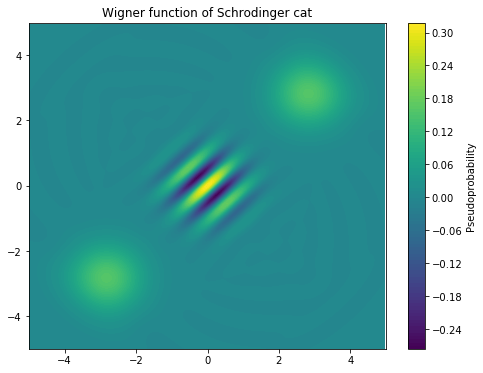

In [30]:
#calculate Wigner function
yvec = xvec = np.arange(-100.,100.)*5./100
g=2.
W = wigner(psi, xvec, yvec)
fig = plt.figure(figsize=(8,6))
c = plt.contourf(xvec, yvec, np.real(W), 100)
plt.xlim([-5,5])
plt.ylim([-5,5])
plt.title('Wigner function of Schrodinger cat')
cbar = plt.colorbar(c)
cbar.ax.set_ylabel('Pseudoprobability');

And as we saw in the last session, we can once again use the Q function to smooth our plot of a quasi-probability distribution by:

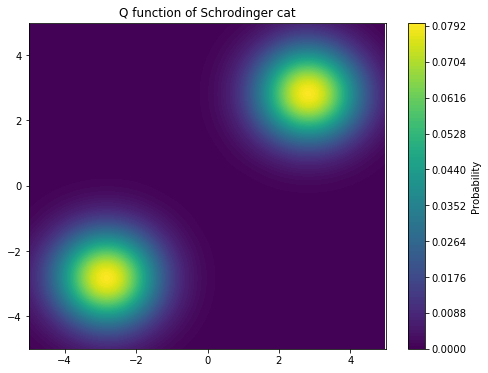

In [31]:
#calculate Q function
Q = qfunc(psi,xvec,yvec)
fig = plt.figure(figsize=(8,6))
qplt = plt.contourf(xvec, yvec, np.real(Q), 100)
plt.xlim([-5,5])
plt.ylim([-5,5])
plt.title('Q function of Schrodinger cat')
cbar = plt.colorbar(qplt)
cbar.ax.set_ylabel('Probability');

## More About

For more information about QuTiP see [https://qutip.org/docs/4.0.2/](https://qutip.org/docs/4.0.2/)

Make sure you choose and run one of the installation paths specified in:[https://qutip.org/docs/4.0.2/installation.html](https://qutip.org/docs/4.0.2/installation.html)

For references of several of the subjects approched here, check also: 
* [Quasiprobability functions](https://en.wikipedia.org/wiki/Quasiprobability_distribution)
* [Wigner quasiprobability distribution](https://en.wikipedia.org/wiki/Wigner_quasiprobability_distribution)
* [Cat state](https://en.wikipedia.org/wiki/Cat_state)